In [13]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot as plt
import seaborn as sns

In [4]:
file = r"C:\Users\Thomas\OneDrive\Desktop\concrete strength regression problem\Concrete_Data_Yeh.csv"
df = pd.read_csv(file)
df

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


# Initial data analysis

In [5]:
df.shape

(1030, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cement            1030 non-null   float64
 1   slag              1030 non-null   float64
 2   flyash            1030 non-null   float64
 3   water             1030 non-null   float64
 4   superplasticizer  1030 non-null   float64
 5   coarseaggregate   1030 non-null   float64
 6   fineaggregate     1030 non-null   float64
 7   age               1030 non-null   int64  
 8   csMPa             1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [9]:
df.nunique()

cement              278
slag                185
flyash              156
water               195
superplasticizer    111
coarseaggregate     284
fineaggregate       302
age                  14
csMPa               845
dtype: int64

In [10]:
df.isna().sum()

cement              0
slag                0
flyash              0
water               0
superplasticizer    0
coarseaggregate     0
fineaggregate       0
age                 0
csMPa               0
dtype: int64

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
flyash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplasticizer,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarseaggregate,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fineaggregate,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
csMPa,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


# Feature correlation using pearson correlation

<AxesSubplot: >

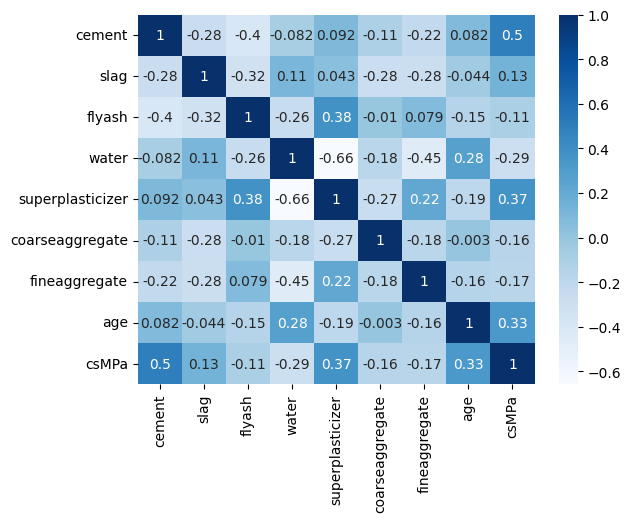

In [14]:
sns.heatmap(df.corr(), annot=True, cmap='Blues')

<AxesSubplot: >

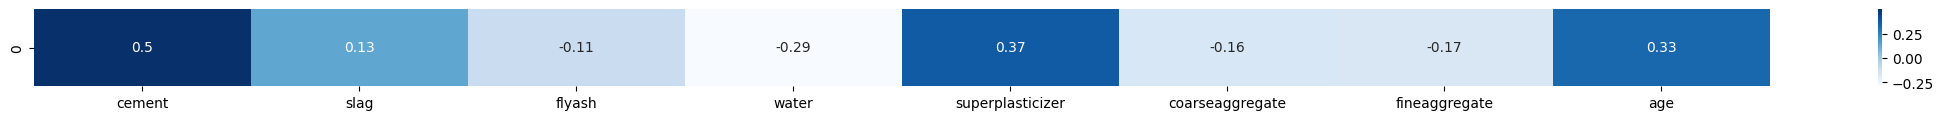

In [67]:
pearson_corr_series = pd.Series(df.corr().iloc[-1,:-1], index=df.columns[:-1])
plt.figure(figsize=(28,1))
sns.heatmap([pearson_corr_series], annot=True, cmap='Blues', xticklabels=pearson_corr_series.index)

<AxesSubplot: >

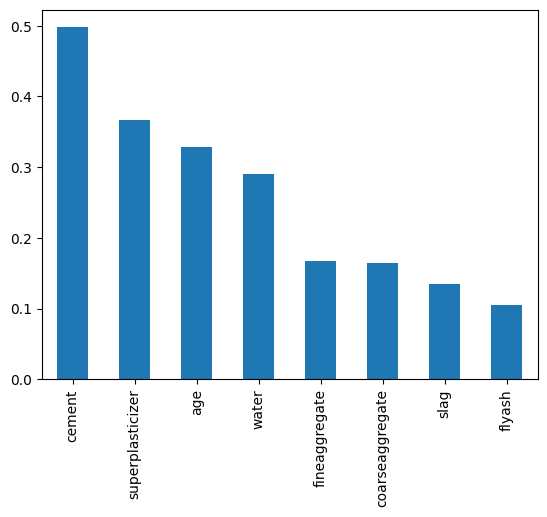

In [64]:
abs(pearson_corr_series).sort_values(ascending=0).plot.bar()

# Top most correlated feature pairs

In [62]:
df.corr().abs().unstack().sort_values(ascending=0)[9::2]

water             superplasticizer    0.657533
csMPa             cement              0.497832
water             fineaggregate       0.450661
cement            flyash              0.397467
superplasticizer  flyash              0.377503
csMPa             superplasticizer    0.366079
age               csMPa               0.328873
flyash            slag                0.323580
csMPa             water               0.289633
slag              coarseaggregate     0.283999
fineaggregate     slag                0.281603
age               water               0.277618
cement            slag                0.275216
coarseaggregate   superplasticizer    0.265999
flyash            water               0.256984
fineaggregate     cement              0.222718
superplasticizer  fineaggregate       0.222691
                  age                 0.192700
coarseaggregate   water               0.182294
                  fineaggregate       0.178481
fineaggregate     csMPa               0.167241
csMPa        

# Split data into training/test sets

In [44]:
X = df.drop('csMPa', axis=1).copy()
X

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360
...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28


In [45]:
y = df['csMPa'].copy()

In [46]:
from sklearn.model_selection import train_test_split

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((824, 8), (206, 8), (824,), (206,))

# Feature importance using mutual information

In [40]:
from sklearn.feature_selection import mutual_info_regression

<AxesSubplot: >

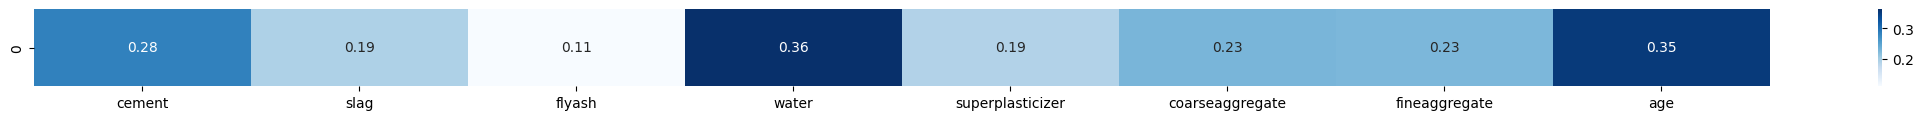

In [76]:
mutual_info_series = pd.Series(mutual_info_regression(X_train, y_train), index = X_train.columns)
plt.figure(figsize=(28,1))
sns.heatmap([mutual_info_series], annot=True, cmap='Blues', xticklabels=mutual_info_series.index)

<AxesSubplot: >

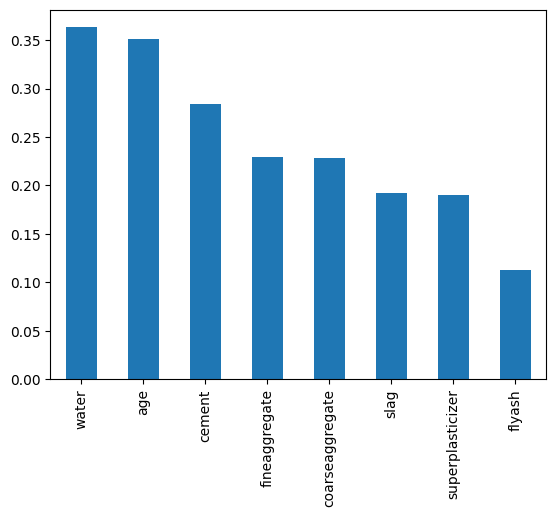

In [53]:
pd.Series(mutual_info_series, index= X_train.columns).sort_values(ascending=0).plot.bar()

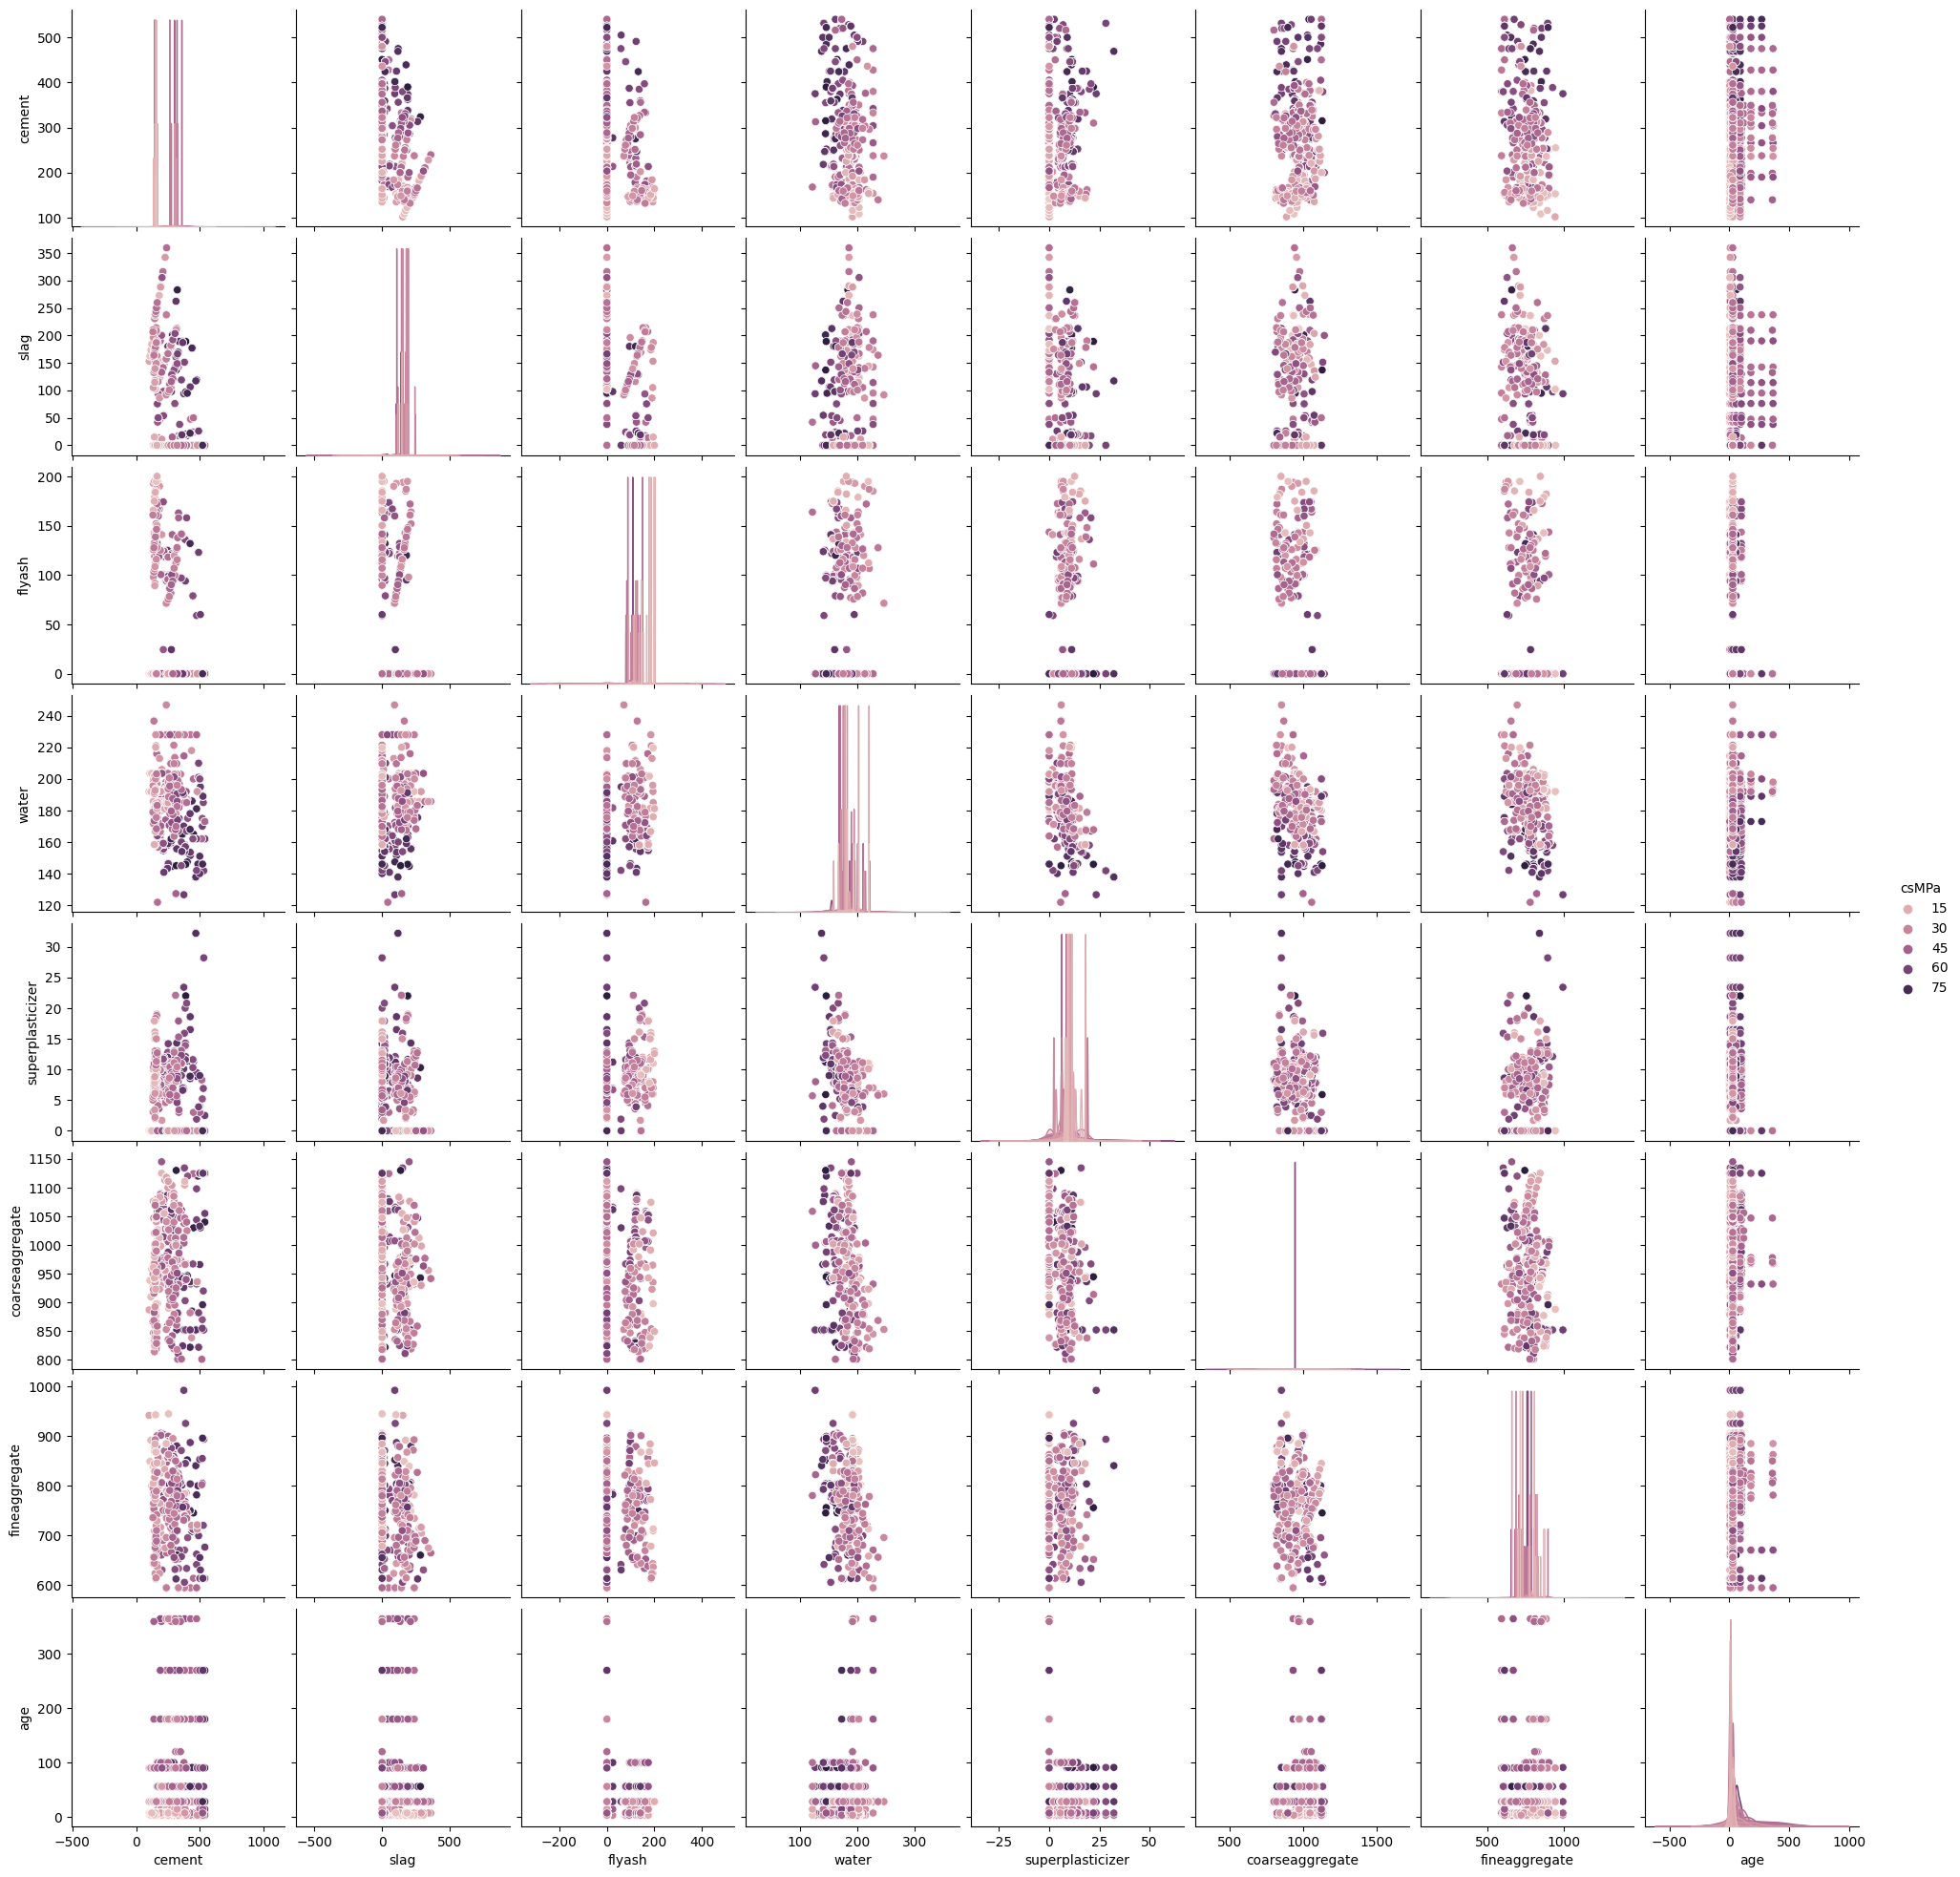

In [77]:
sns.pairplot(data=df, hue='csMPa')

In [80]:
mutual_info_series.sort_values(ascending=0).columns

water               0.362617
age                 0.352076
cement              0.284135
coarseaggregate     0.227826
fineaggregate       0.225022
slag                0.191628
superplasticizer    0.188593
flyash              0.109147
dtype: float64

In [86]:
mutual_info_series.sort_values(ascending=0).index[0:4]

Index(['water', 'age', 'cement', 'coarseaggregate'], dtype='object')

<Figure size 1500x1000 with 0 Axes>

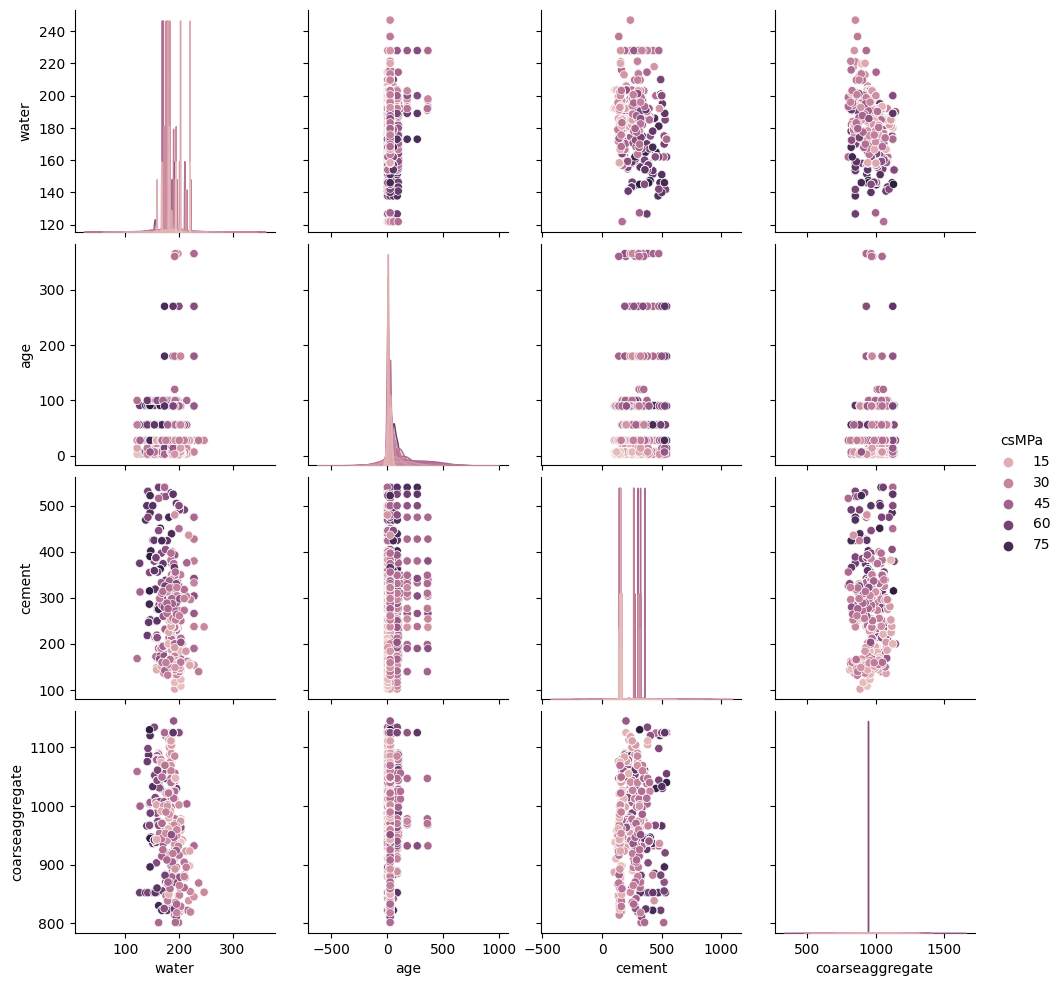

In [90]:
plt.figure(figsize=(15,10))
sns.pairplot(data=df,hue='csMPa', vars=mutual_info_series.sort_values(ascending=0).index[0:4])

# Comparison of Lowest/Highest concrete strength

In [117]:
comparison_dict = {'5 lowest strength': df.groupby(by='csMPa').mean().iloc[0:5].mean(),
                   '5 greatest strength': df.groupby(by='csMPa').mean().iloc[-5:].mean()}
pd.DataFrame(comparison_dict)

,5 lowest strength,5 greatest strength
cement,125.44,391.70
slag,162.66,159.56
flyash,0.00,0.00
water,198.90,156.52
superplasticizer,0.00,12.54
coarseaggregate,928.64,1000.42
fineaggregate,856.54,718.50
age,3.00,51.80


# Pipeline construction

In [128]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [129]:
num_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='mean')),
    ('standarize',StandardScaler())
])

In [155]:
def prepare_model(algorithm, X_train, y_train):
    
    model = Pipeline(steps=[
        ('preprocessing', num_pipeline),
        ('algorithm', algorithm)
    ])
    model.fit(X_train, y_train)
    return model

# Training algorithms

In [147]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, BaggingRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
import time
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [156]:
algorithms = [RandomForestRegressor(), AdaBoostRegressor(), GradientBoostingRegressor(), BaggingRegressor(), SVR(),\
             DecisionTreeRegressor(), ExtraTreeRegressor(), LinearRegression(), SGDRegressor(), KNeighborsRegressor(),\
             ]

In [157]:
names = []
times = []
mses = []
maes = []

for algorithm in algorithms:
    name = type(algorithm).__name__
    names.append(name)
    print(name)
    start_time = time.time()
    model = prepare_model(algorithm, X_train, y_train)
    pred = model.predict(X_test)
    end_time = time.time()
    print(end_time - start_time)
    times.append(end_time - start_time)
    mses.append(mean_squared_error(y_test, pred))
    maes.append(mean_absolute_error(y_test, pred))
    

RandomForestRegressor
0.23424482345581055
AdaBoostRegressor
0.06981682777404785
GradientBoostingRegressor
0.08091068267822266
BaggingRegressor
0.028507471084594727
SVR
0.03789925575256348
DecisionTreeRegressor
0.006982088088989258
ExtraTreeRegressor
0.003964424133300781
LinearRegression
0.008975744247436523
SGDRegressor
0.005983591079711914
KNeighborsRegressor
0.0059814453125


# Comparing algorithm performance 

In [160]:
results_dict = {'Algorithm': names, 'MSE': mses, 'MAE': maes, 'Time': times}
pd.DataFrame(results_dict).sort_values(by='MSE', ascending=1)

,Algorithm,MSE,MAE,Time
0,RandomForestRegressor,21.682111,3.320500,0.234245
3,BaggingRegressor,23.018616,3.511687,0.028507
2,GradientBoostingRegressor,24.754077,3.683968,0.080911
6,ExtraTreeRegressor,50.642884,4.706893,0.003964
5,DecisionTreeRegressor,56.257986,4.784757,0.006982
1,AdaBoostRegressor,61.362868,6.555105,0.069817
9,KNeighborsRegressor,75.134410,6.883417,0.005981
4,SVR,91.524783,7.581353,0.037899
7,LinearRegression,95.617174,7.864642,0.008976
8,SGDRegressor,95.706007,7.838143,0.005984


# Visualization of true and predicted values on the test set

Text(0, 0.5, 'Pred')

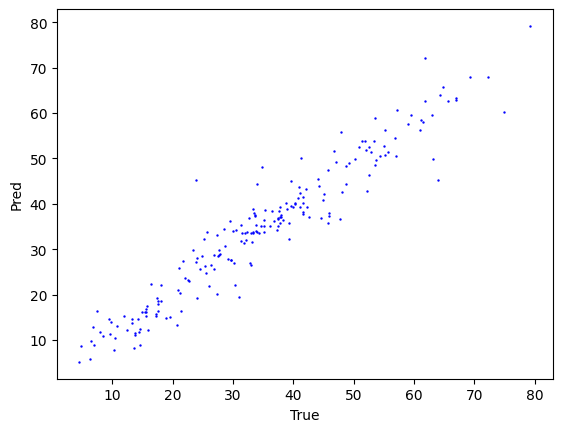

In [170]:
model = prepare_model(RandomForestRegressor(), X_train, y_train)
pred = model.predict(X_test)

plt.scatter(y_test, pred, c='b', s=0.5)
plt.xlabel('True')
plt.ylabel('Pred')

In [174]:
pd.DataFrame({'True': y_test, 'Pred': pred})

,True,Pred
747,26.06,21.9720
718,10.35,7.7056
175,79.30,79.2130
828,74.99,60.3038
713,9.69,11.2924
...,...,...
624,27.53,28.4292
987,33.76,34.0947
424,33.01,26.5716
889,33.72,37.5089


# Conclusion

In this notebook, the results show that Random Forests was the optimal algorithm at predicting concrete strength, with an MSE ane MAE of 21.68 and 3.32 respecfully.

Further exploration would involve fine-tuning the different hyper-parameters of each algorithm, which should be able to achieve even better performance than the results achieved today.